### Exercise 1
• study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assume the following priors:
- a uniform distribution
- a Jeffrey’s prior
- a step function

• plot the posterior distribution and summerize the results computing the first two moments<br>
• compute a 95% credibility interval and give the results in a summary table<br>
• draw the limits on the plot of the posterior distribution<br>

In [2]:
library(dplyr)
library(ggplot2)

 a) Plot the posterior distribution and summarize the results computing the first two moments
 
 We will begin our study of binomial inference with a uniform prior. Subsequently, we will explore the use of a Jeffreys prior, and finally, we will investigate a step prior that is user-defined.

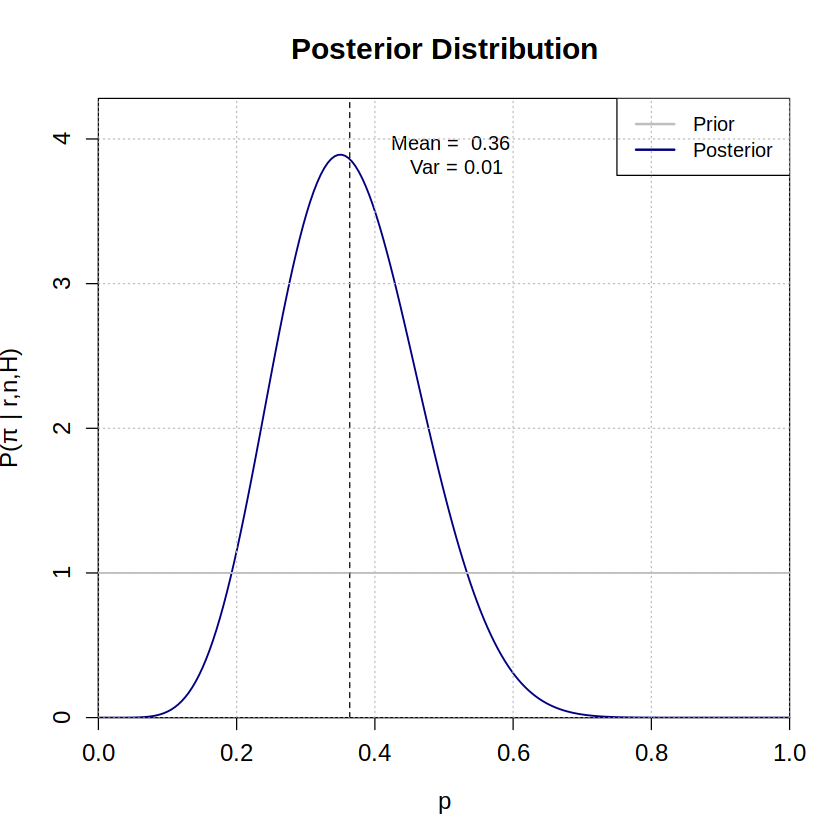

In [3]:
#define parameters
n <-  20                  #trials
r <- 7                      #successes
n.sample <-200 
delta.p <- 1/n.sample
p <- seq(0, 1, length.out = n.sample)


#uniform prior distribution ( =beta(1,1) function)
prior.unif <- dbeta(p, 1, 1)
prior.unif.norm <- prior.unif/sum(prior.unif*delta.p)

#posterior distribution
post.unif <- dbinom (x=r, size=n, prob=p )  # x is the number of successes
                                                                                  # size is the number of trials 
                                                                                  # prob : the probability of success of each trial (uniform)

post.unif.norm <- post.unif /sum(post.unif*delta.p)                   #normalization

p.unif.mean <- delta.p*sum(p*post.unif.norm)                                  #compute first moment
p.unif.var <- delta.p*sum(p*p*post.unif.norm)-p.unif.mean**2   #compute second moment


# Set font size for the plot
par(cex.lab=1.2, cex.axis=1.2, cex.main=1.5, cex.sub=1.2)

#Plot
plot(p, post.unif.norm, xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd=1.5, ylim=c(0, 1.1*max(post.unif.norm)),
         xlab="p", ylab=expression(paste(P, "(\u03C0 | r,n,H)")), main="Posterior Distribution")
lines(p,prior.unif.norm, col='grey', type='l', lty=1, lwd=1.5)
legend("topright", legend=c("Prior", "Posterior"), col=c("grey", "navy"), lty=1, lwd=2)

# Add vertical line and mean label
abline(v=p.unif.mean, lty=2)
text(p.unif.mean+0.15, max(post.unif.norm), paste("Mean = ", round(p.unif.mean, digits=2), '\n Var =', round(p.unif.var,2)))
grid(lty=3, col="gray")

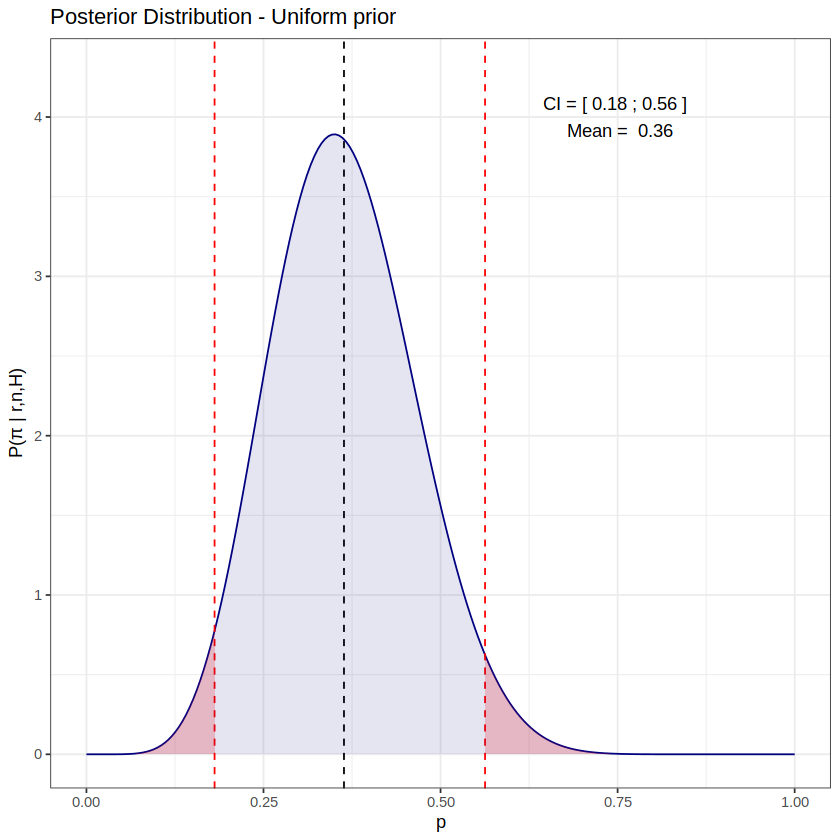

In [4]:
# Compute cumulative sum of posterior density
cum_prior <- cumsum(post.unif.norm * delta.p)

# Find values enclosing 0.95 probability mass
lower_bound <- min(p[cum_prior >= 0.025])
upper_bound <- max(p[cum_prior <= 0.975])

# Plot posterior density and credibility interval
ggplot(data = data.frame(x = p, y = post.unif.norm), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.unif.norm), x <= lower_bound)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.unif.norm), x >= upper_bound)) +
    geom_vline(xintercept = lower_bound, color = "red", linetype = "dashed")+
    geom_vline(xintercept = upper_bound, color = "red", linetype = "dashed")+
    geom_vline(xintercept = p.unif.mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(post.unif.norm)) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.75, y = 4, label = paste("CI = [", round(lower_bound,digits=2), ';',round(upper_bound, digits=2) ,'] \n Mean = ',round(p.unif.mean, digits=2)))+
    ggtitle("Posterior Distribution - Uniform prior")
  

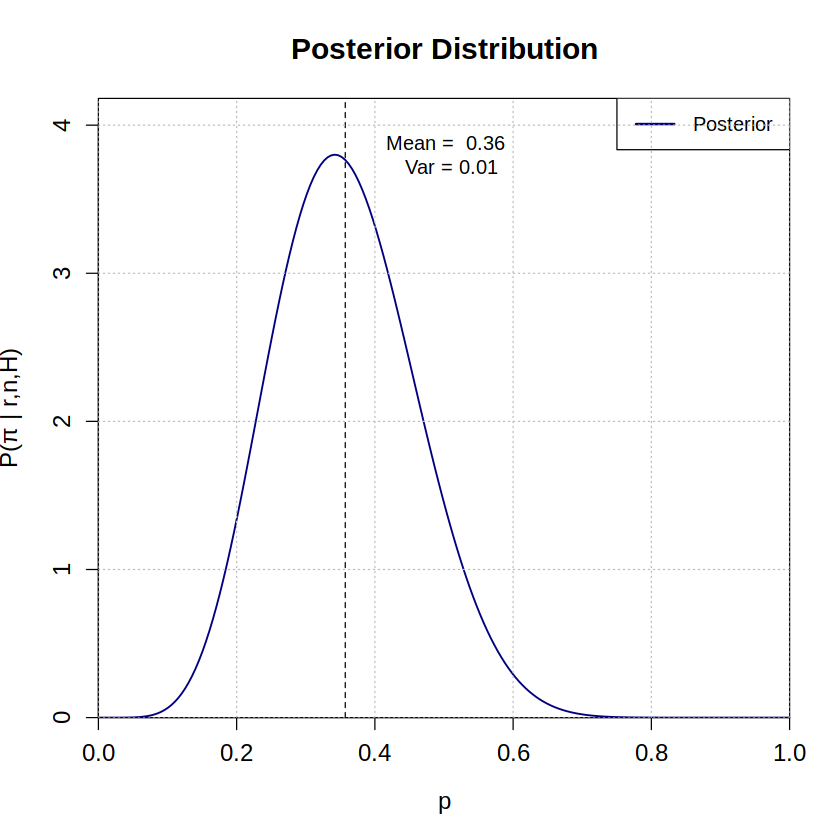

In [10]:
#Posterior using Jeffrey’s prior
alpha_p <-1/2
beta_p <- 1/2
alpha <- alpha_p +r
beta <- beta_p+ n -r
post.jeff <- dbeta(p, alpha , beta)

#compute first and second moment
p.jeff.mean <- alpha /( alpha + beta)
p.jeff.var <- (alpha /( alpha + beta)**2)*(beta+n-r)/(alpha+beta+n+1)

# Set font size for the plot
par(cex.lab=1.2, cex.axis=1.2, cex.main=1.5, cex.sub=1.2)

#Plot
plot(p, post.jeff, xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd=1.5,xlim=c(0,1), ylim=c(0, 1.1*max(post.jeff)),
         xlab="p", ylab=expression(paste(P, "(\u03C0 | r,n,H)")), main="Posterior Distribution")
legend("topright", legend=c("Posterior"), col=c("navy"), lty=1, lwd=2)

# Add vertical line and mean label
abline(v=p.jeff.mean, lty=2)
text(p.jeff.mean+0.15, max(post.jeff), paste("Mean = ", round(p.jeff.mean, digits=2), '\n Var =', round(p.jeff.var,2)))
grid(lty=3, col="gray")

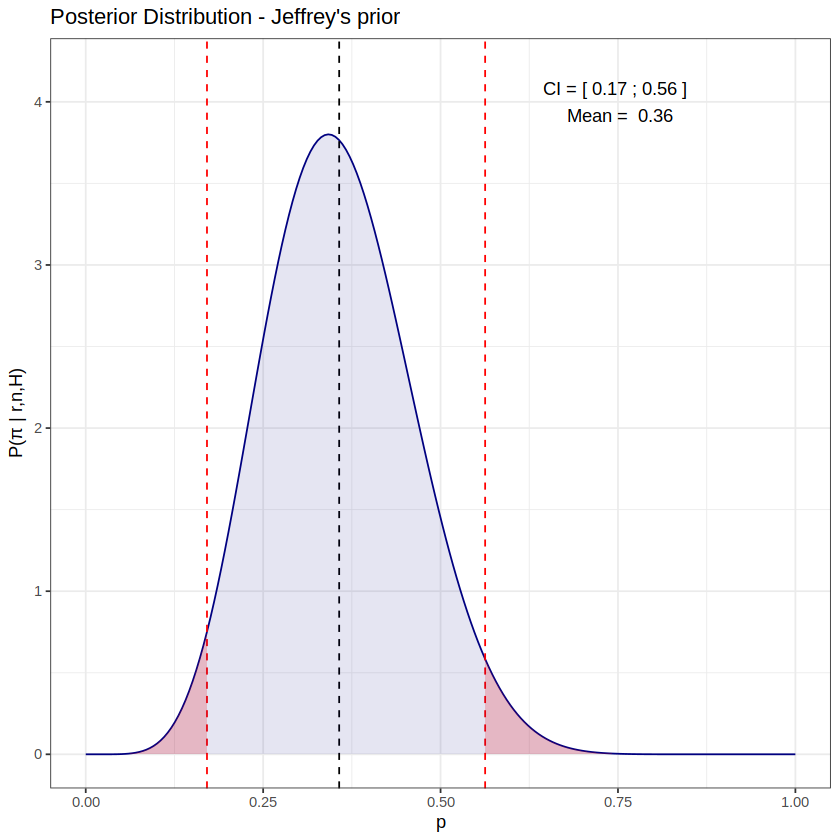

In [7]:
# Compute cumulative distribution function
cum.post <- cumsum(post.jeff)/sum(post.jeff)

# Find upper and lower bounds for 95% CI
lower.jeff <- min(p[cum.post >= 0.025])
upper.jeff <- max(p[cum.post <= 0.975])

# Plot posterior density and credibility interval
ggplot(data = data.frame(x = p, y = post.jeff), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.jeff), x <= lower.jeff)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.jeff), x >= upper.jeff)) +
    geom_vline(xintercept = lower.jeff, color = "red", linetype = "dashed")+
    geom_vline(xintercept = upper.jeff, color = "red", linetype = "dashed")+
    geom_vline(xintercept = p.jeff.mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(post.jeff)) +
    xlim(0,1)+
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.75, y = 4, label = paste("CI = [", round(lower.jeff,digits=2), ';',round(upper.jeff, digits=2) ,'] \n Mean = ',round(p.jeff.mean, digits=2)))+
    ggtitle("Posterior Distribution - Jeffrey's prior")
  


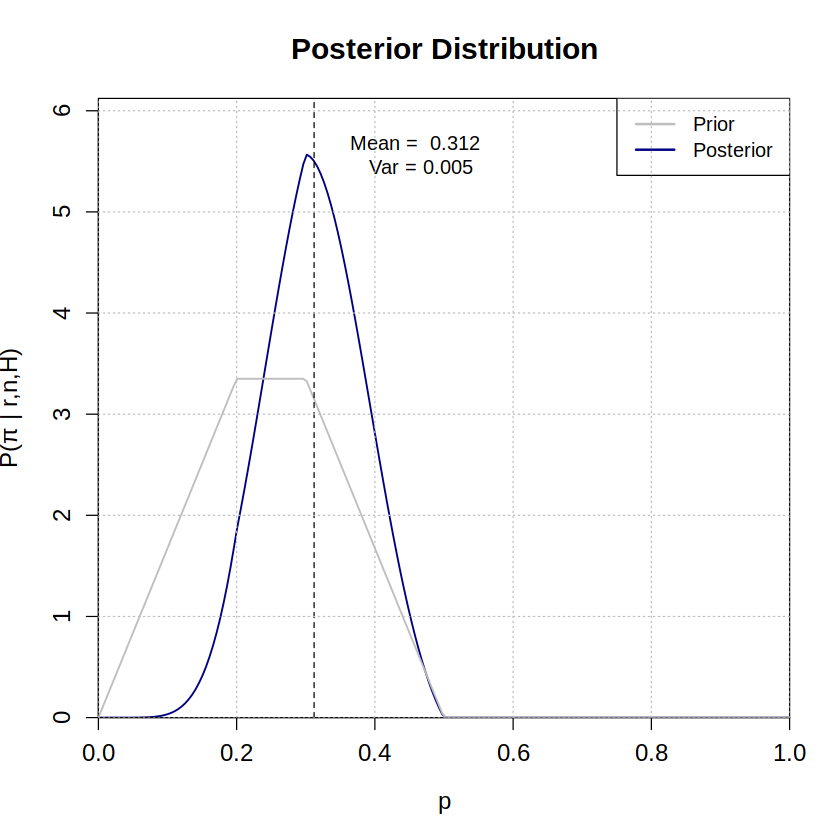

In [14]:
#step prior definition
step <- function(x) {
    if (x <= 0.2) { 
        return(x)}
    else if (x >=0.2 & x<=0.3){ 
       return(0.2)}
    else if (x>0.3 & x<=0.5){
        return(0.5-x)}
    else if (x>0.5){
        return(0)}
}

prior.step <- sapply(p,step)
prior.step.norm <- prior.step /( delta.p*sum(prior.step)) #normalization
prior.step.norm <- prior.step / (delta.p * sum(prior.step))

#posterior function
p.like <- dbinom (x=r, size=n, prob=p)  
post.step <- sapply(p,step)*p.like
post.step.norm <- post.step/sum(post.step*delta.p)


#compute mean and var
p.step.mean <- sum(p*post.step.norm)*delta.p
p.step.var <- sum(p*p*post.step.norm)*delta.p-p.step.mean**2 

# Set font size for the plot
par(cex.lab=1.2, cex.axis=1.2, cex.main=1.5, cex.sub=1.2)

#Plot
plot(p, post.step.norm, xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd=1.5,xlim=c(0,1), ylim=c(0, 1.1*max(post.step.norm)),
         xlab="p", ylab=expression(paste(P, "(\u03C0 | r,n,H)")), main="Posterior Distribution")
lines(p,prior.step.norm, col='grey', type='l', lty=1, lwd=1.5)
legend("topright", legend=c("Prior", "Posterior"), col=c("grey", "navy"), lty=1, lwd=2)

# Add vertical line and mean label
abline(v=p.step.mean, lty=2)
text(p.step.mean+0.15, max(post.step.norm), paste("Mean = ", round(p.step.mean, digits=3),'\n Var =', round(p.step.var,3)))
grid(lty=3, col="gray")

Warning message:
“Removed 40 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 40 rows containing missing values (`geom_line()`).”

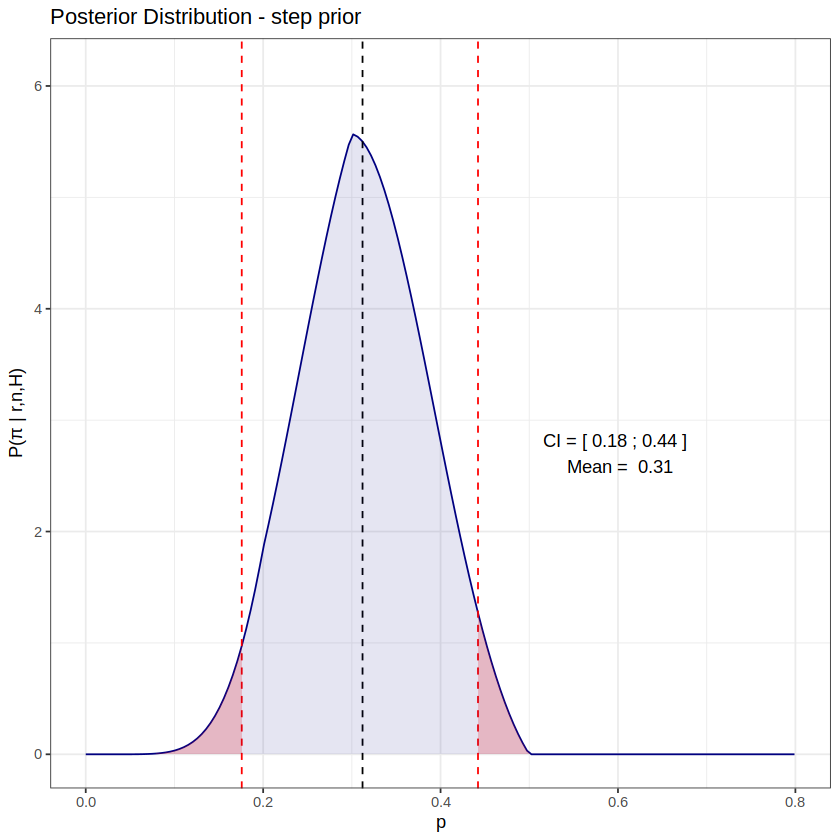

In [9]:
# Compute cumulative distribution function
cum.post <- cumsum(post.step )/sum(post.step )

# Find upper and lower bounds for 95% CI
lower <- min(p[cum.post >= 0.025])
upper <- max(p[cum.post <= 0.975])

# Plot posterior density and credibility interval
ggplot(data = data.frame(x = p, y = post.step.norm), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.step.norm), x <= lower)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "red", alpha = 0.2, 
              data = subset(data.frame(x = p, y = post.step.norm), x >= upper)) +
    geom_vline(xintercept = lower, color = "red", linetype = "dashed")+
    geom_vline(xintercept = upper, color = "red", linetype = "dashed")+
    geom_vline(xintercept = p.step.mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(post.step.norm)) +
    xlim(0, 0.8) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.6, y = 2.7, label = paste("CI = [", round(lower,digits=2), ';',round(upper, digits=2) ,'] \n Mean = ',round(p.step.mean, digits=2)))+
    ggtitle("Posterior Distribution - step prior")


In [9]:
#summarize the results in a data frame
cred_int_unif <- c(lower_bound, upper_bound)
cred_int_jeff <- c(lower.jeff, upper.jeff)
cred_int_step <- c(lower, upper)

# Create a data frame with the results
results <- data.frame(
  Method = c("Uniform Prior", "Jeffrey's Prior", "Step Prior"),
  Credibility_Interval = c(paste("[", round(cred_int_unif[1], 2), ", ", round(cred_int_unif[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_jeff[1], 2), ", ", round(cred_int_jeff[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_step[1], 2), ", ", round(cred_int_step[2], 2), "]", sep = "")
                          )
)

# Print the summary table
results

Method,Credibility_Interval
Uniform Prior,"[0.18, 0.56]"
Jeffrey's Prior,"[0.17, 0.56]"
Step Prior,"[0.18, 0.44]"


## Exercise 2
Giardia cysts[1] is a parassite that can contaminate food, water, and surfaces, and they can cause
giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person
swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects. <br>
A group of researchers, working for a Human Health Department, work for determining the quality
of stream water <br>
They take n = 116 samples of one-liter water from sites identified to have a heavy environmental
impact from birds and waterflow. <br>
• out of these samples, y = 17 samples contained Giard cystis <br>
• assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior
distribution for π: 
assuming a uniform prior distribution and
assuming a Beta (1, 4) prior <br>
• plot the posterior distribution and summerize the results computing the first two moments <br>
• find a normal approximation for the posterior g π y <br>
• compute a 95% credibility interval both for the original posterior and for the normal approximation,
giving the results in a summary table <br>
• add the limits on the plot of the posterior distributions <br>

a)  Plot the posterior distribution and summerize the results computing the first two moments 

In [37]:
#define the parameters of the problem and the p vector
n <- 116
r <- 17
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

Warning message:
“Removed 400 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 400 rows containing missing values (`geom_line()`).”Warning message:
“Removed 400 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 400 rows containing missing values (`geom_line()`).”

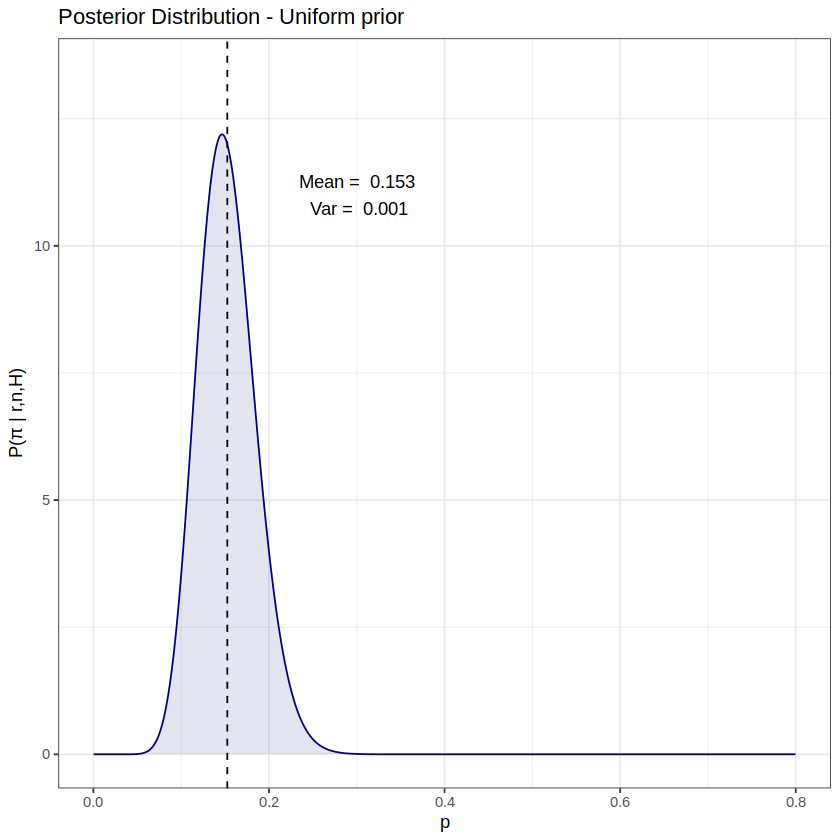

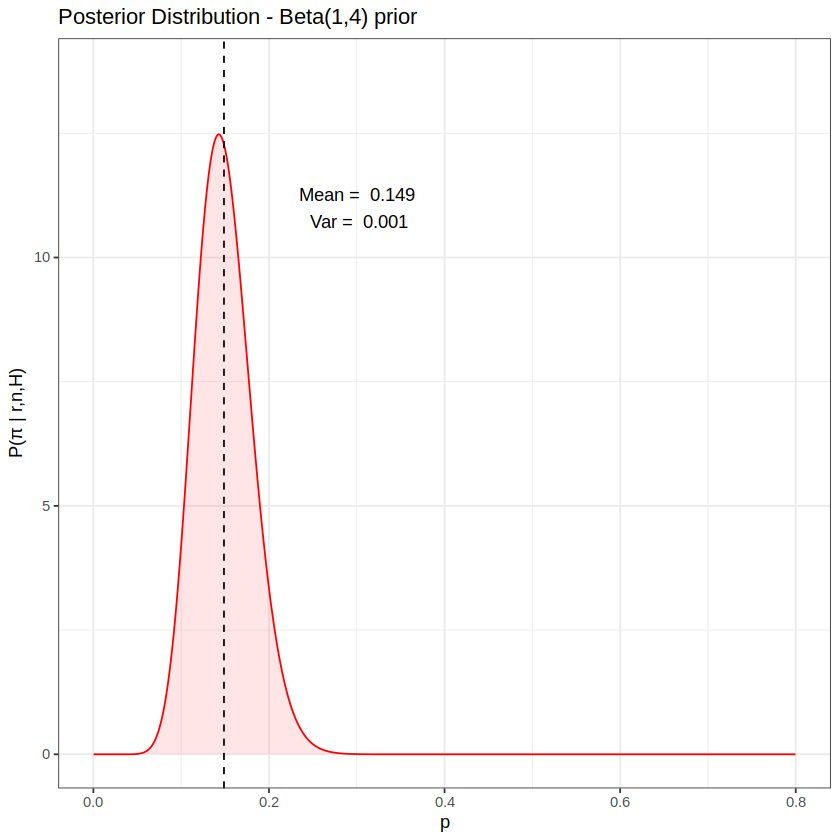

In [38]:
#assuming first a uniform prior
unif_post_star <- dbinom (x=r, size=n, prob=p)                                      # x is the number of successes
                                                                                                                                # size is the number of trials 
                                                                                                                                # prob : the probability of success of each trial (uniform)

unif_post_norm <- unif_post_star /( delta*sum(unif_post_star ))   #normalization

#compute first and second moment
unif_mean <- delta*sum(p*unif_post_norm) 
unif_var <- delta*sum(p*p*unif_post_norm)-unif_mean**2 

#Now assume a Beta (1, 4) prior
alpha <- 1
beta <- 4
beta_post_norm <- dbeta(p, alpha+r , beta+n-r)

#compute first and second moment
beta_mean <- (alpha+r) /( alpha + beta+n)
beta_var <- ((alpha+r) /( alpha + beta+n)**2)*(beta+n-r)/(alpha+beta+n+1)
beta_var_2 <- delta*sum(p*p*beta_post_norm)-beta_mean**2  #equivalent calculation



#Plot posterior (uniform prior)
ggplot(data = data.frame(x = p, y = unif_post_norm), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_vline(xintercept = unif_mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(unif_post_norm)) +
    xlim(0, 0.8) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.3, y = 11, label = paste(' Mean = ',round(unif_mean, digits=3), '\n Var = ', round(unif_var,3)))+
    ggtitle("Posterior Distribution - Uniform prior")

#Plot posterior (beta prior)
ggplot(data = data.frame(x = p, y = beta_post_norm), aes(x = x, y = y)) + 
    geom_line(color = "red") +
    geom_vline(xintercept = beta_mean, color = "black", linetype = "dashed")+
    geom_area(fill = "red", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(beta_post_norm)) +
    xlim(0, 0.8) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.3, y = 11, label = paste(' Mean = ',round(beta_mean, digits=3), '\n Var = ', round(beta_var,3)))+
    ggtitle("Posterior Distribution - Beta(1,4) prior")

b) Find a normal approximation for the posterior g(π|y) 

Warning message:
“Removed 1300 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1300 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1300 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1300 rows containing missing values (`geom_line()`).”Warning message:
“Removed 1300 rows containing missing values (`geom_line()`).”Warning message:
“Removed 1300 rows containing missing values (`geom_line()`).”

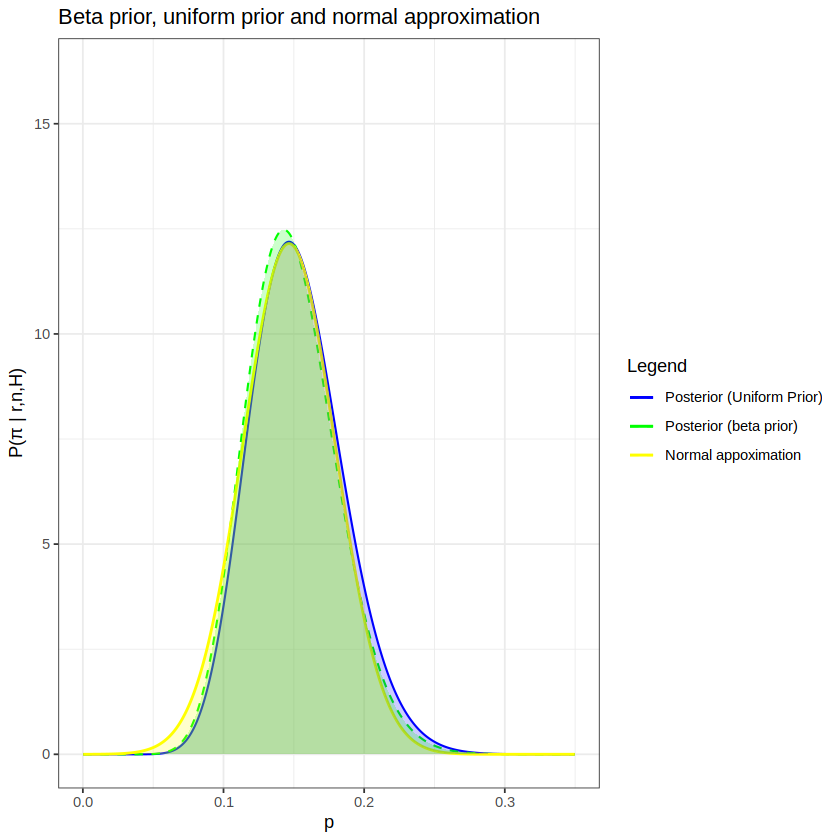

In [40]:
#Find a normal approximation for the posterior g(π | y)
mean <-r/n
sd <- sqrt(mean*(n-r))/n
gauss <-dnorm(p, mean, sd)

norm <- sum(gauss*delta) #normalization
gauss <- gauss/norm

#Plot
df <- data.frame(x = p, y1 = unif_post_norm, y2=beta_post_norm, y3 = gauss)
ggplot(data =df, aes(x)) + 
    geom_line(aes(y = y1, color = "blue"), linewidth=0.6) +
    geom_line(aes(y = y2, color = "green"), linewidth=0.6,  linetype = "dashed")+
    geom_line(aes(y = y3, color = "yellow"), linewidth=0.8) +
    geom_area(aes(y = y1, fill = "blue"), alpha = 0.2) +
    geom_area(aes(y = y2, fill = "green"), alpha = 0.2) +
    geom_area(aes(y = y3, fill = "yellow"), alpha = 0.2) +
    scale_fill_manual(values = c("blue" = "blue", "green" = "green", "yellow" = "yellow"),name = "Legend Title") +
    theme_bw()+
    ylim(0, 1.3*max(beta_post_norm)) +
    xlim(0, 0.35) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    ggtitle("Beta prior, uniform prior and normal approximation")+
    scale_color_manual(name = "Legend", values = c("blue", "green", "yellow"), 
    labels = c("Posterior (Uniform Prior)", "Posterior (beta prior)", "Normal appoximation")) +
    guides(fill = FALSE)

c)  Compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table 

In [41]:
#compute a 95% credibility interval both for the original posterior and for the normal approximation

#compute a 95% CI for the uniform
cum_unif <- cumsum(unif_post_norm)/sum(unif_post_norm) # Compute cumulative distribution function
lower_unif  <- min(p[cum_unif >= 0.025])# Find upper and lower bounds for 95% CI
upper_unif  <- max(p[cum_unif <= 0.975])

#compute a 95% CI for the beta
cum_beta <- cumsum(beta_post_norm)/sum(beta_post_norm) # Compute cumulative distribution function
lower_beta <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_beta <- max(p[cum_beta <= 0.975])

#compute a 95% CI for the gauss
cum_gauss <- cumsum(gauss)/sum(gauss) # Compute cumulative distribution function
lower_gauss <- min(p[cum_gauss >= 0.025])# Find upper and lower bounds for 95% CI
upper_gauss <- max(p[cum_gauss <= 0.975])

#summarize the result in a data frame
cred_int_unif <- c(lower_unif, upper_unif)
cred_int_beta <- c(lower_beta, upper_beta)
cred_int_gauss <- c(lower_gauss, upper_gauss)

# Create a data frame with the results
results <- data.frame(
  Method = c("Uniform Prior", "Beta Prior", "Gaussian Approximation"),
  Credibility_Interval = c(paste("[", round(cred_int_unif[1], 2), ", ", round(cred_int_unif[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_beta[1], 2), ", ", round(cred_int_beta[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_gauss[1], 2), ", ", round(cred_int_gauss[2], 2), "]", sep = "")
                          )
)

# Print the summary table
results

Method,Credibility_Interval
Uniform Prior,"[0.09, 0.22]"
Beta Prior,"[0.09, 0.22]"
Gaussian Approximation,"[0.08, 0.21]"


Warning message:
“Removed 1000 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1000 rows containing missing values (`geom_line()`).”Warning message:
“Removed 1000 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1000 rows containing missing values (`geom_line()`).”

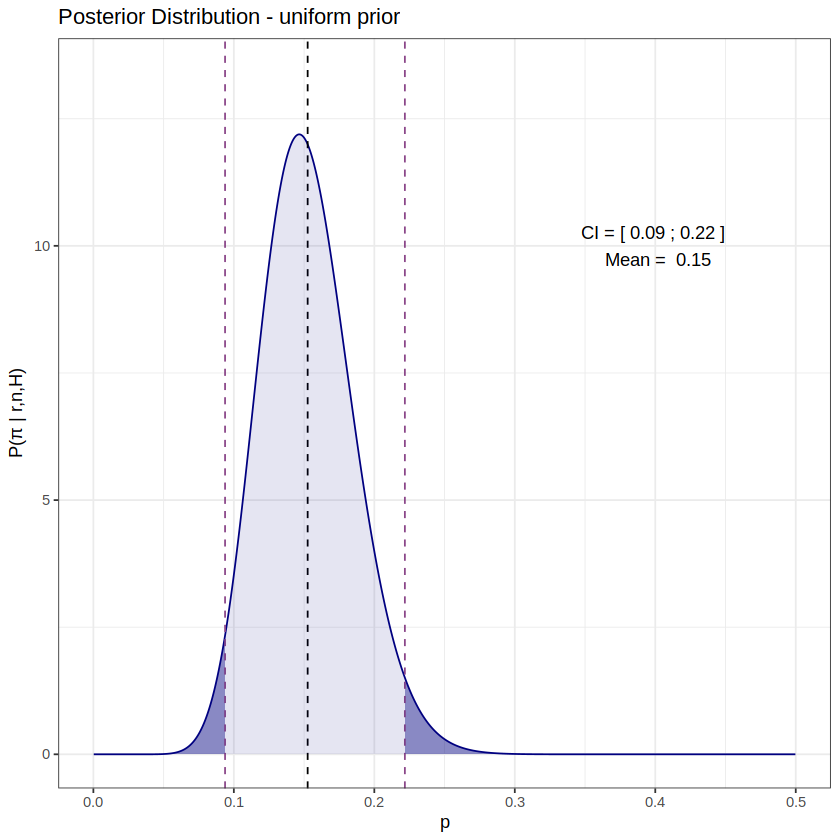

Warning message:
“Removed 1000 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1000 rows containing missing values (`geom_line()`).”

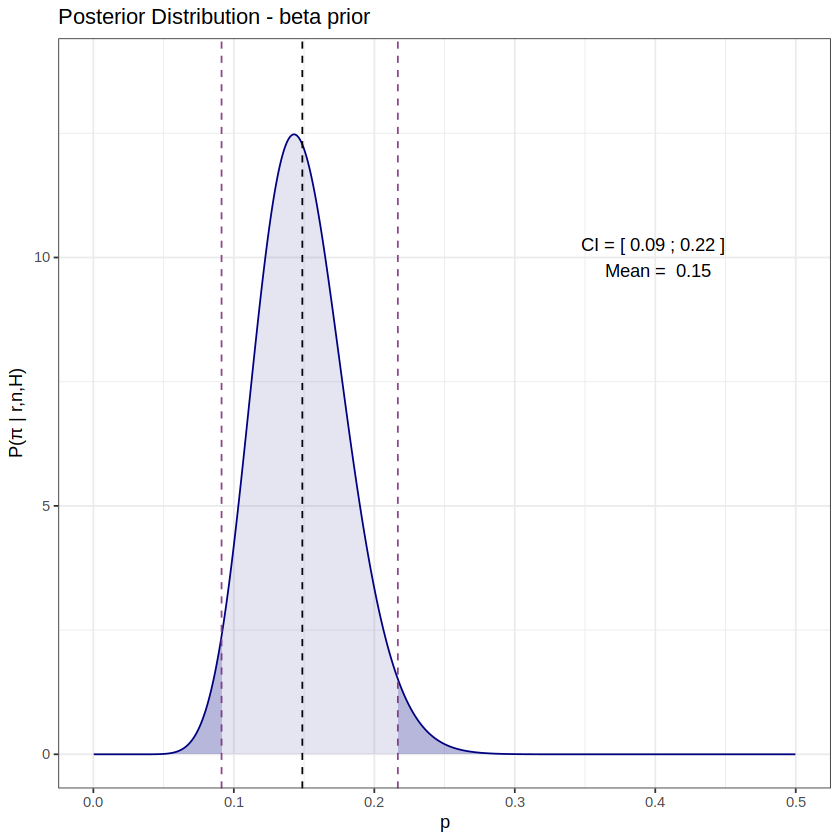

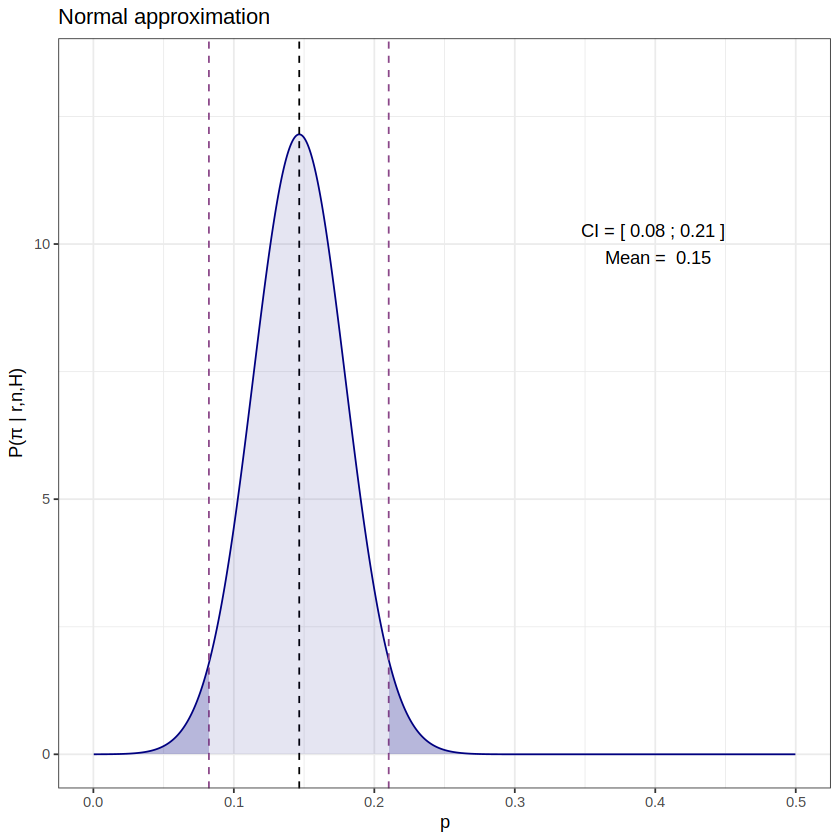

In [42]:
# add the limits on the plot of the posterior distributions 

ggplot(data = data.frame(x = p, y = unif_post_norm), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.4, 
              data = subset(data.frame(x = p, y = unif_post_norm), x <= cred_int_unif[1])) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.4, 
              data = subset(data.frame(x = p, y = unif_post_norm), x >= cred_int_unif[2])) +
    geom_vline(xintercept = cred_int_unif[1], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = cred_int_unif[2], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = unif_mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(unif_post_norm)) +
    xlim(0, 0.5) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.4, y = 10, label = paste("CI = [", round(cred_int_unif[1],digits=2), ';',round(cred_int_unif[2], digits=2) ,'] \n Mean = ',round(unif_mean, digits=2)))+
    ggtitle("Posterior Distribution - uniform prior")


ggplot(data = data.frame(x = p, y = beta_post_norm), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.2, 
              data = subset(data.frame(x = p, y = beta_post_norm), x <= cred_int_beta[1])) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.2, 
              data = subset(data.frame(x = p, y = beta_post_norm), x >= cred_int_beta[2])) +
    geom_vline(xintercept = cred_int_beta[1], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = cred_int_beta[2], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = beta_mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(beta_post_norm)) +
    xlim(0, 0.5) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.4, y = 10, label = paste("CI = [", round(cred_int_beta[1],digits=2), ';',round(cred_int_beta[2], digits=2) ,'] \n Mean = ',round(beta_mean, digits=2)))+
    ggtitle("Posterior Distribution - beta prior")


ggplot(data = data.frame(x = p, y = gauss), aes(x = x, y = y)) + 
    geom_line(color = "navy") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.2, 
              data = subset(data.frame(x = p, y = gauss), x <= cred_int_gauss[1])) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.2, 
              data = subset(data.frame(x = p, y = gauss), x >= cred_int_gauss[2])) +
    geom_vline(xintercept = cred_int_gauss[1], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = cred_int_gauss[2], color = "orchid4", linetype = "dashed")+
    geom_vline(xintercept = mean, color = "black", linetype = "dashed")+
    geom_area(fill = "navy", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(gauss)) +
    xlim(0, 0.5) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    annotate("text", x = 0.4, y = 10, label = paste("CI = [", round(cred_int_gauss[1],digits=2), ';',round(cred_int_gauss[2], digits=2) ,'] \n Mean = ',round(mean, digits=2)))+
    ggtitle("Normal approximation")

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H <br>
a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set.<br>
b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability
distribution, give an estimate for a 95% credibility interval.<br>
c) Repeat the same analysis assuming a sequential analysis of the data 1 . Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).<br>
d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
(i.e. considering all the data as a whole) ?<br>

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set. <br>
Let's start assuming a uniform prior:

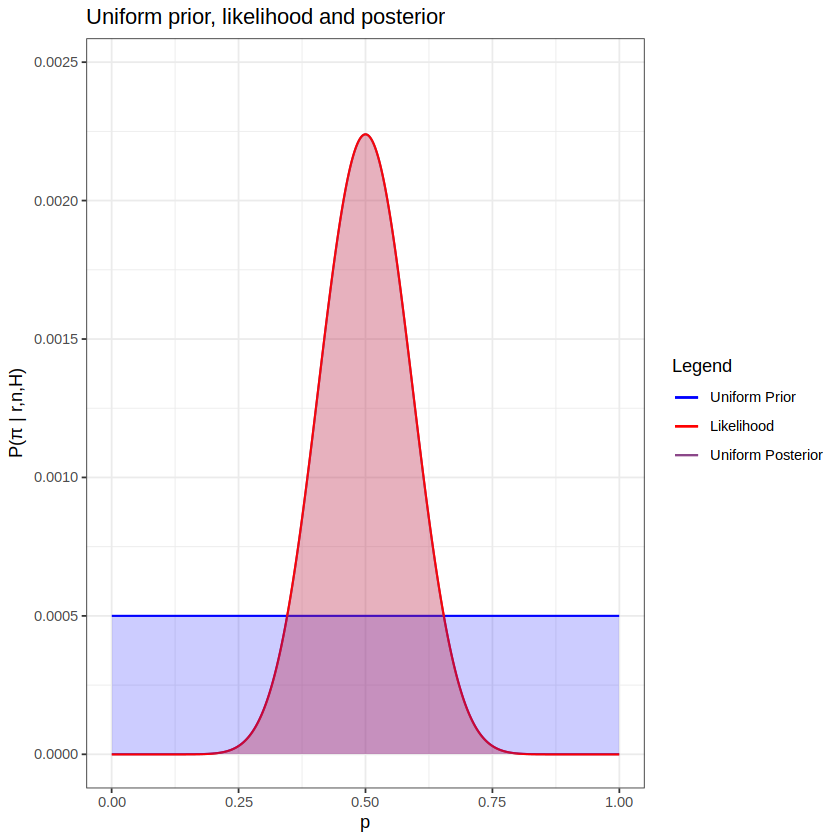

In [45]:
#Define the parameters
r <- 15 #successes
n <- 30 #trials

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

#uniform prior ( =beta(1,1) function)
U_prior <- dbeta(p, 1, 1)
U_prior_n <- U_prior/sum(U_prior)

#likelihood function for a binomial experiment with n trials and r successes is given by
likelihood <-  dbinom(x=r, size=n, prob=p)  
likelihood_n <- likelihood/sum(likelihood)

#posterior
U_posterior <- dbinom(x=r, size=n, prob=p)
U_posterior_n <- U_posterior/sum(U_posterior)

#plot (uniform prior)
df <- data.frame(x = p, y1 = U_prior_n, y2=likelihood_n, y3 = U_posterior_n)
ggplot(data =df, aes(x)) + 
    geom_line(aes(y = y1, color = "blue"), linewidth=0.6) +
    geom_line(aes(y = y2, color = "red"), linewidth=0.6)+
    geom_line(aes(y = y3, color = "orchid4"), linewidth=0.6) +
    geom_area(aes(y = y1, fill = "blue"), alpha = 0.2) +
    geom_area(aes(y = y2, fill = "red"), alpha = 0.2) +
    geom_area(aes(y = y3, fill = "orchid4"), alpha = 0.2) +
    scale_fill_manual(values = c("blue" = "blue", "red" = "red", "orchid4" = "orchid4"),name = "Legend Title") +
    theme_bw()+
    ylim(0, 1.1*max(likelihood_n)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    ggtitle("Uniform prior, likelihood and posterior")+
    scale_color_manual(name = "Legend", values = c("blue", "red", "orchid4"), labels = c("Uniform Prior", "Likelihood", "Uniform Posterior")) +
    guides(fill = FALSE)

In the following code, we perform the same analysis but with a beta prior. <br>
Note that the likelihood retains the same shape as in the case of a uniform prior.

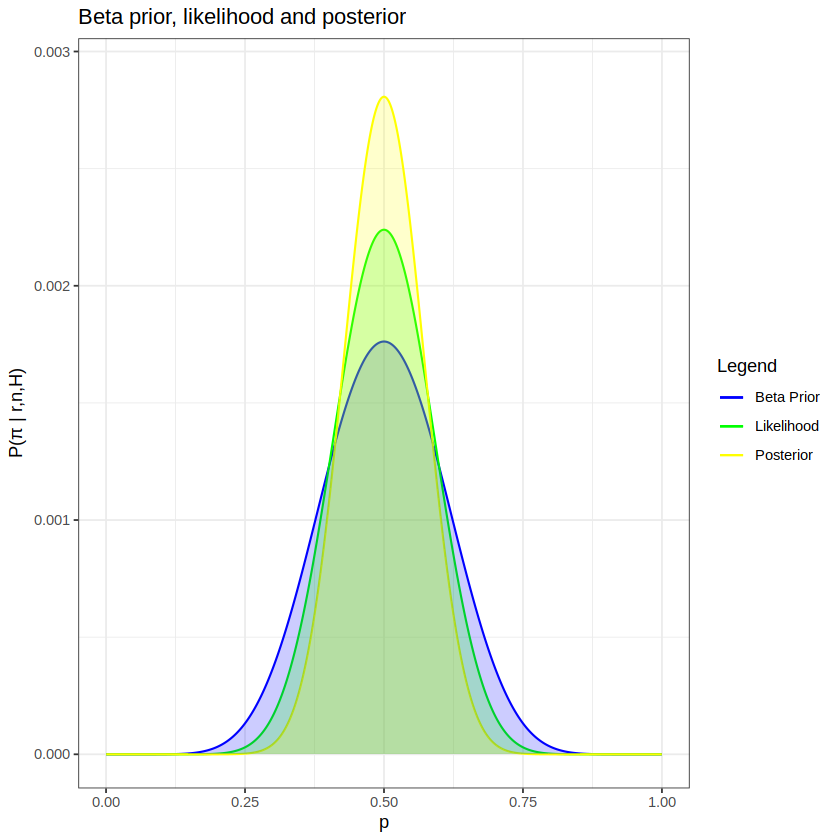

In [15]:
#Define the parameters
r <- 15  #successes
n <- 30 #trials

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

#Beta prior
alpha <- 10
beta <- 10
B_prior <- dbeta(p, alpha, beta)
B_prior_n <- B_prior/sum(B_prior)

#likelihood function for a binomial experiment with n trials and r successes is given by
likelihood <-  dbinom(x=r, size=n, prob=p)  
likelihood_n <- likelihood/sum(likelihood)

#posterior
B_posterior <- dbeta(p, alpha+r, beta+n-r)
B_posterior_n <- B_posterior/sum(B_posterior)

#plot (beta prior)
df <- data.frame(x = p, y1 = B_prior_n, y2=likelihood_n, y3 = B_posterior_n)
ggplot(data =df, aes(x)) + 
    geom_line(aes(y = y1, color = "blue"), linewidth=0.6) +
    geom_line(aes(y = y2, color = "green"), linewidth=0.6)+
    geom_line(aes(y = y3, color = "yellow"), linewidth=0.6) +
    geom_area(aes(y = y1, fill = "blue"), alpha = 0.2) +
    geom_area(aes(y = y2, fill = "green"), alpha = 0.2) +
    geom_area(aes(y = y3, fill = "yellow"), alpha = 0.2) +
    scale_fill_manual(values = c("blue" = "blue", "green" = "green", "yellow" = "yellow"),name = "Legend Title") +
    theme_bw()+
    ylim(0, 1.3*max(likelihood_n)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    ggtitle("Beta prior, likelihood and posterior")+
    scale_color_manual(name = "Legend", values = c("blue", "green", "yellow"), labels = c("Beta Prior", "Likelihood", "Posterior")) +
    guides(fill = FALSE)

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval. <br>
It has to be noticed that if we assume a flat prior distribution for the probability of success in a Binomial distribution, then the posterior distribution is proportional to the likelihood function. Therefore, the mode of the posterior distribution is simply the same as the maximum likelihood estimate (MLE) for the parameter of interest. <br>
In addition, as regard as the beta prior, the most probable value for the coin probability p is the mode of the posterior distribution, given by: <br>

$mode = \frac{(\alpha + r - 1)}{(\alpha + \beta + n - 2)}$


The most probable value for the coin probability p assuming a uniform prior is:  0.5 
The most probable value for the coin probability p assuming a beta prior is:  0.5

Method,Credibility_Interval
Uniform Prior,"[0.36, 0.64]"
Beta Prior,"[0.36, 0.64]"


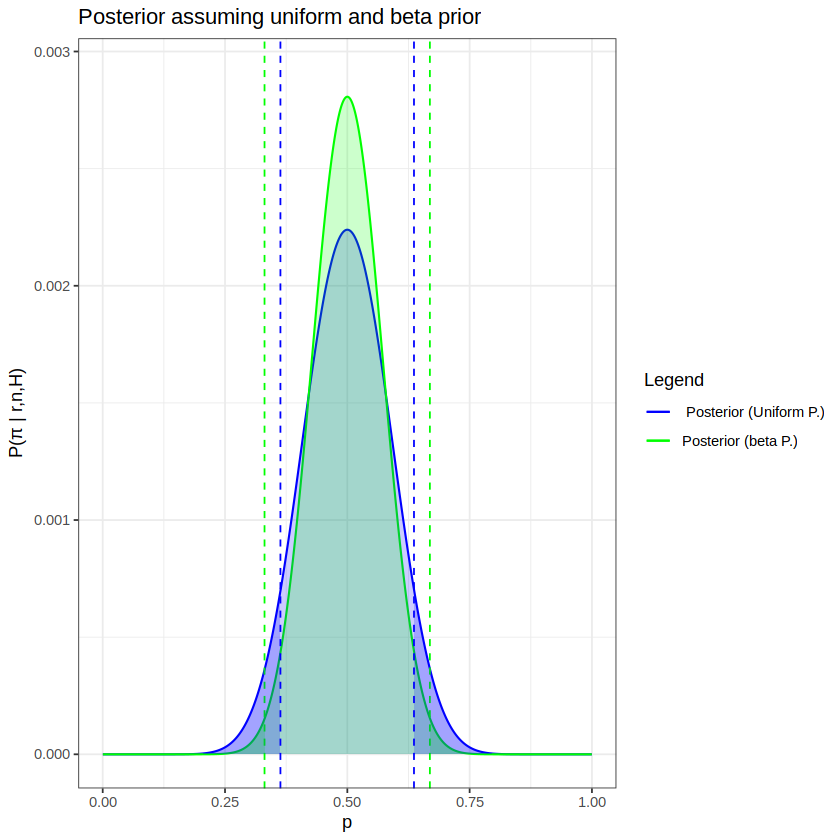

In [17]:
#The most probable value for the coin probability p is the mode
U_mode_index <- which.max(U_posterior_n)
U_mode <- p[U_mode_index]

B_mode <- (alpha + r - 1)/( alpha + beta +n - 2)
cat('The most probable value for the coin probability p assuming a uniform prior is: ', round(U_mode,2), '\n')
cat('The most probable value for the coin probability p assuming a beta prior is: ',  B_mode)

#compute a 95% CI for the uniform distibution
cum_beta <- cumsum(B_posterior_n)/sum(B_posterior_n) # Compute cumulative distribution function
lower_unif <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_unif <- max(p[cum_beta <= 0.975])

#compute a 95% CI for the beta distribution
cum_beta <- cumsum(U_posterior_n)/sum(U_posterior_n) # Compute cumulative distribution function
lower_beta <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_beta <- max(p[cum_beta <= 0.975])

#summarize the result in a data frame
cred_int_unif <- c(lower_unif, upper_unif)
cred_int_beta <- c(lower_beta, upper_beta)


# Define the dataframe with background colors
results <- data.frame(
  Method = c("Uniform Prior", "Beta Prior"),
  Credibility_Interval = c(paste("[", round(cred_int_unif[1], 2), ", ", round(cred_int_unif[2], 2), "]", sep = "")
))
results


#plot (beta prior)
df <- data.frame(x = p, y1 = U_posterior_n, y2 = B_posterior_n)
ggplot(data =df, aes(x)) + 
    geom_line(aes(y = y1, color = "blue"), linewidth=0.6) +
    geom_line(aes(y = y2, color = "green"), linewidth=0.6)+
    geom_area(aes(y = y1, fill = "blue"), alpha = 0.2) +
    geom_area(aes(y = y2, fill = "green"), alpha = 0.2) +

    geom_ribbon(aes(ymax = y, ymin = 0), fill = "green", alpha = 0.2, 
              data = subset(data.frame(x = p, y = B_posterior_n), x <= lower_beta)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "green", alpha = 0.2, 
              data = subset(data.frame(x = p, y = B_posterior_n), x >= upper_beta)) +
    geom_vline(xintercept = lower_beta, color = "green", linetype = "dashed")+
    geom_vline(xintercept = upper_beta, color = "green", linetype = "dashed")+

    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = U_posterior_n), x <= lower_unif)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = U_posterior_n), x >= upper_unif)) +
    geom_vline(xintercept = lower_unif, color = "blue", linetype = "dashed")+
    geom_vline(xintercept = upper_unif, color = "blue", linetype = "dashed")+

    scale_fill_manual(values = c("blue" = "blue", "green" = "green", "yellow" = "yellow"),name = "Legend Title") +
    theme_bw()+
    ylim(0, 1.3*max(likelihood_n)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(\u03C0 | r,n,H)"))) +
    ggtitle("Posterior assuming uniform and beta prior")+
    scale_color_manual(name = "Legend", values = c("blue", "green"), labels = c(" Posterior (Uniform P.)", "Posterior (beta P.)")) +
    guides(fill = FALSE)

c) Repeat the same analysis assuming a sequential analysis of the data 1 . Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

#### Sequential analysis assuming a flat prior

In [55]:
#Define the parameters
trials <- c('T','T','T','T','T','H','T','T','H','H','T','T','H','H','H','T','H','T','H','T','H','H','T','H','T','H','T','H')
x <- numeric(length(trials)) #sequentially filled with 0=T or 1=H

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

# Define likelihood function
likelihood_function <- function(r, n, p) {
  likelihood <- dbinom(r, n, p)
  likelihood_n <- likelihood/sum(likelihood)
  return(likelihood_n)
}

# Define prior flat function
uniform_prior_function <- function(p) {
  uniform <- dbeta(p, 1, 1)
  uniform_n <- uniform/sum(uniform)
  return(uniform_n)
}

# Define posterior flat function
uniform_post_function <- function(p, r, n) {
    uniform_post <- uniform_prior_function(p)*likelihood_function(r, n, p)
    norm <- sum(uniform_post)
  return(uniform_post/norm)
}

# Define prior beta function
beta_prior_function <- function(p, alpha, beta) {
  beta_dist <- dbeta(p, alpha, beta)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

# Define posterior beta function
beta_post_function <- function(p, alpha, beta, r, n) {
  beta_dist <- dbeta(p, alpha+r, beta+n-r)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

#define CI function
compute_CI <- function(post_norm,p){
    cum_function <- cumsum(post_norm)/sum(post_norm) # Compute cumulative distribution function
    lower <- min(p[cum_function >= 0.025])                               # Find upper and lower bounds for 95% CI
    upper <- max(p[cum_function <= 0.975])
    return(list(lower = lower, upper = upper))
}

#write CI in a datframe
df <- data.frame(Trial = numeric(),
                 Successes = numeric(),
                 Confidence_Interval = character(),
                 stringsAsFactors = FALSE)

#initialize x_i (trials in binary 0-1 form), r successes and n trials
x_i <- numeric(length(trials))
r <- 0
n <- 0

# Create an empty list to store the plots
plots <- list() 

# loop over trials
for (i in 1:length(trials)) {
    count <- ifelse(trials[i] == "H", 1, 0)
    r <- r + count
    n <- n + 1

    # Calculate posterior distribution and the most probable value
    posterior <- uniform_post_function(p, r, n)
    U_mode_index <- which.max(posterior)
    U_mode <- p[U_mode_index]

    #compute CI and send it to df
    CI_list  <- compute_CI(posterior,p)
    U_lower <- CI_list[[1]]
    U_upper <- CI_list[[2]]
    df <- df %>% add_row(Trial=c(n),
                       Successes=c(r),
                       Confidence_Interval=c(paste('[' ,round(U_lower,2), ';', round(U_upper,2),']')))
    
    # Set font size for the plot
    par(cex.lab=0.3, cex.axis=0.5, cex.main=1, cex.sub=1)

  # Create ggplot object
  plot <- ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "blue") +
    geom_vline(xintercept = U_mode, color = "red", linetype = "dashed")+
    geom_area(fill = "blue", alpha = 0.1) +
    
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x <= U_lower)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x >= U_upper)) +
    
    theme_bw()+
    ylim(0, max(posterior) * 1.1) +
    annotate("text", x = U_mode+0.35, y = max(posterior), label = paste("Mode = ", round(U_mode,digits=2)),size = 2.5)+
    annotate("text", x = U_mode+0.35, y = max(posterior)-0.0002, label = paste("r =", r, ', n =', n),size = 2.5)+
    xlab("p") +
    ylab("P(p | r, n, H)") +
    ggtitle(paste0("Trial ", i))
  
  # Add plot to list, setting the size of the ylab
  plots[[i]] <- plot + theme(axis.title.y = element_text(size = 10)) 
}

In [56]:
df

Trial,Successes,Confidence_Interval
1,0,[ 0.01 ; 0.84 ]
2,0,[ 0.01 ; 0.71 ]
3,0,[ 0.01 ; 0.6 ]
4,0,[ 0.01 ; 0.52 ]
5,0,[ 0 ; 0.46 ]
6,1,[ 0.04 ; 0.58 ]
7,1,[ 0.03 ; 0.53 ]
8,1,[ 0.03 ; 0.48 ]
9,2,[ 0.07 ; 0.56 ]
10,3,[ 0.11 ; 0.61 ]


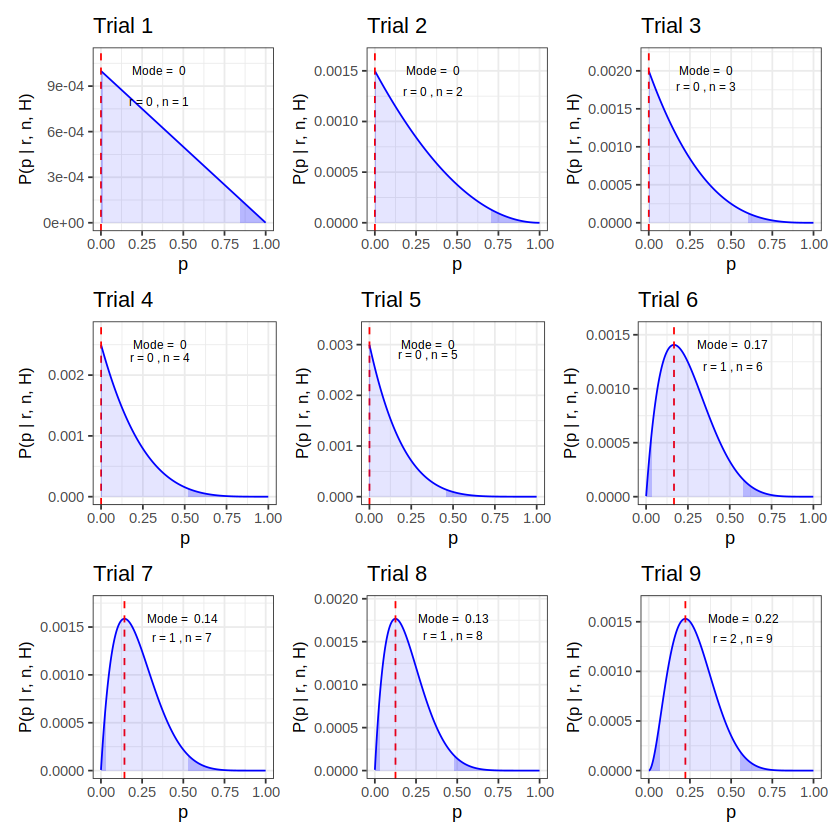

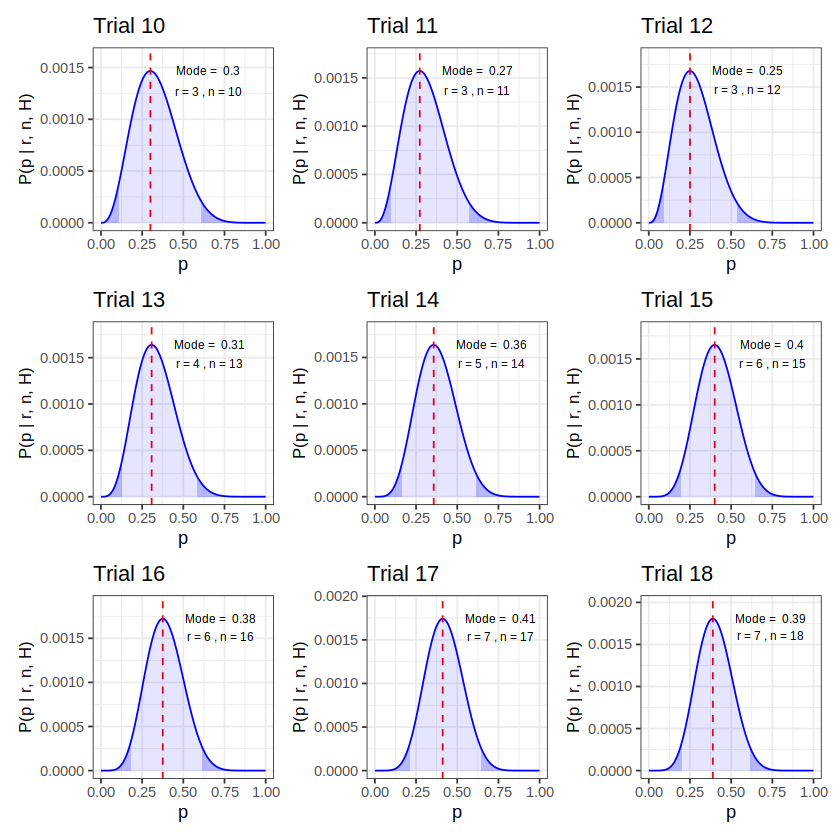

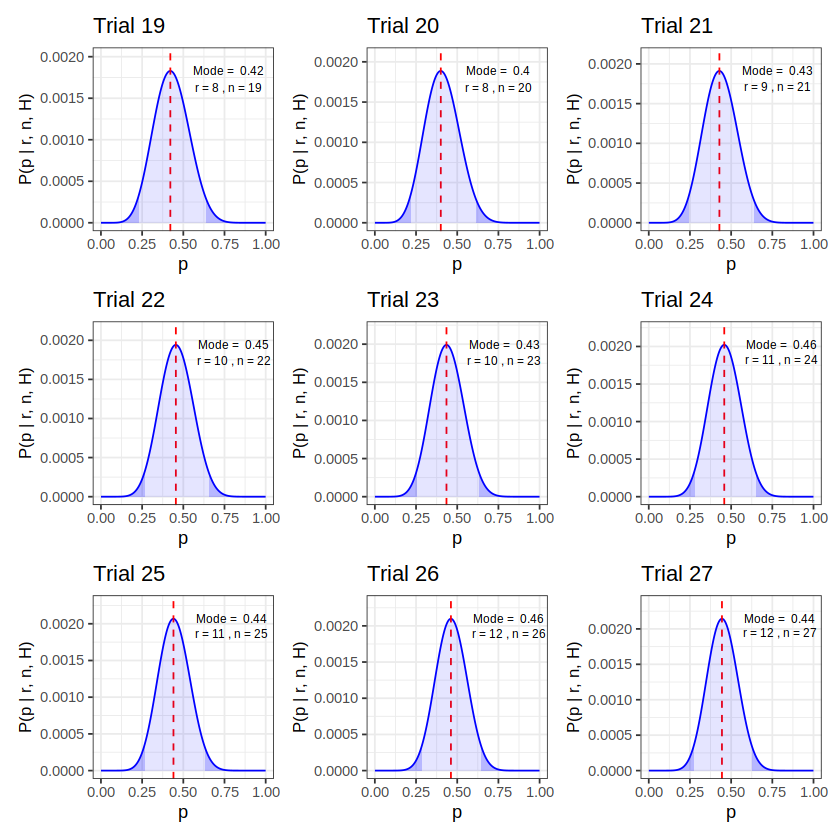

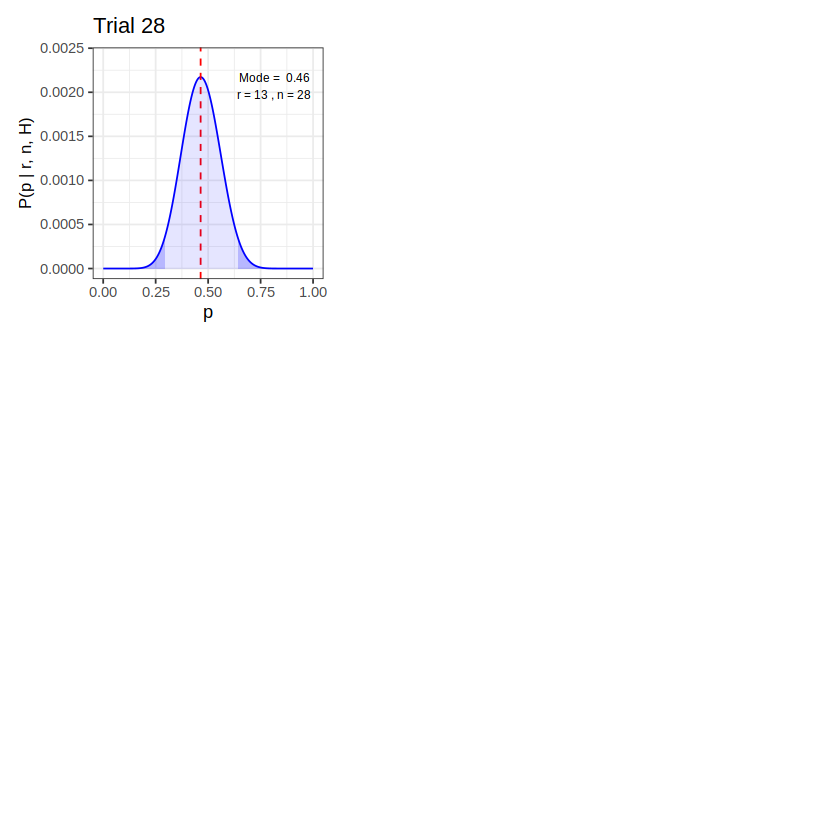

In [57]:
# create the combined plot using plots in the list
library(patchwork)
combined_plots1 <- (plots[[1]] +plots[[2]]+  plots[[3]]) / (plots[[4]] +plots[[5]]+  plots[[6]]) / (plots[[7]] +plots[[8]] + plots[[9]])  
combined_plots2 <-  (plots[[10]] +plots[[11]] + plots[[12]])  / (plots[[13]] +plots[[14]] + plots[[15]])  / (plots[[16]] +plots[[17]] + plots[[18]]) 
combined_plots3 <-  (plots[[19]] +plots[[20]] +plots[[21]]) /(plots[[22]] +plots[[23]] +plots[[24]])  /(plots[[25]] +plots[[26]] +plots[[27]]) 
combined_plots4 <- (plots[[28]]+plot_spacer()+plot_spacer()) /(plot_spacer()+plot_spacer()+plot_spacer())  /(plot_spacer()+plot_spacer()+plot_spacer())

combined_plots1
combined_plots2
combined_plots3
combined_plots4

#### Sequential analysis assuming a beta prior

In [21]:
#write CI in a datframe
df <- data.frame(Trial = numeric(),
                 Successes = numeric(),
                 Confidence_Interval = character(),
                 stringsAsFactors = FALSE)

#initialize x_i (trials in binary 0-1 form), r successes and n trials
x_i <- numeric(length(trials))
r <- 0
n <- 0

#define alpha and beta
alpha <- 10
beta <- 10

plots <- list() # Create an empty list to store the plots

# loop over trials
for (i in 1:length(trials)) {
    count <- ifelse(trials[i] == "H", 1, 0)
    r <- r + count
    n <- n + 1

    # Calculate posterior distribution and the most probable value
    posterior <- beta_post_function(p, alpha, beta, r, n)
    B_mode <- (alpha + r - 1)/( alpha + beta +n - 2)
    
    #compute CI and send it to df
    CI_list  <- compute_CI(posterior,p)
    B_lower <- CI_list[[1]]
    B_upper <- CI_list[[2]]
    df <- df %>% add_row(Trial=c(n),
                       Successes=c(r),
                       Confidence_Interval=c(paste('[' ,round(B_lower,2), ';', round(B_upper,2),']')))
    
    # Set font size for the plot
    par(cex.lab=0.3, cex.axis=0.5, cex.main=1, cex.sub=1)

  # Create ggplot object
  plot <- ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "blue") +
    geom_vline(xintercept = B_mode, color = "red", linetype = "dashed")+
    geom_area(fill = "blue", alpha = 0.1) +
    
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x <= B_lower)) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x >= B_upper)) +
    
    theme_bw()+
    ylim(0, max(posterior) * 1.1) +
    annotate("text", x = B_mode+0.3, y = max(posterior), label = paste("Mode = ", round(B_mode,digits=2)),size = 2.5)+
    annotate("text", x = B_mode+0.3, y = max(posterior)-0.0002, label = paste("r =", r, ', n =', n),size = 2.5)+
    xlab("p") +
    ylab("P(p | r, n, H)") +
    ggtitle(paste0("Trial ", i))
  
  # Add plot to list, setting the size of the ylab
  plots[[i]] <- plot + theme(axis.title.y = element_text(size = 10)) 
}

In [22]:
df

Trial,Successes,Confidence_Interval
1,0,[ 0.27 ; 0.68 ]
2,0,[ 0.26 ; 0.66 ]
3,0,[ 0.24 ; 0.64 ]
4,0,[ 0.23 ; 0.61 ]
5,0,[ 0.22 ; 0.59 ]
6,1,[ 0.24 ; 0.61 ]
7,1,[ 0.23 ; 0.59 ]
8,1,[ 0.22 ; 0.58 ]
9,2,[ 0.24 ; 0.59 ]
10,3,[ 0.26 ; 0.61 ]


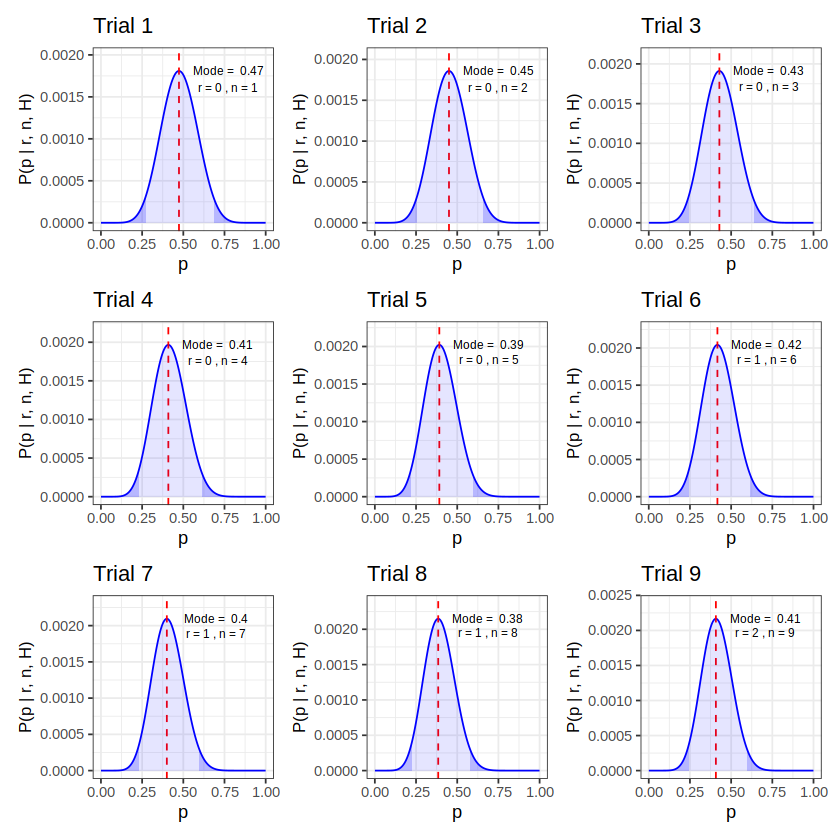

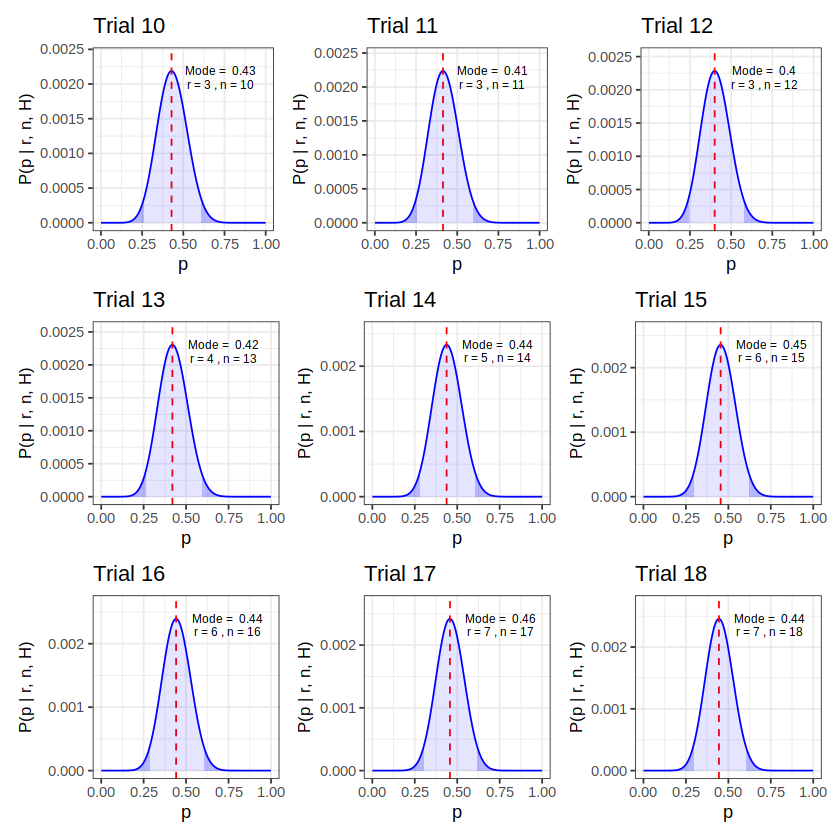

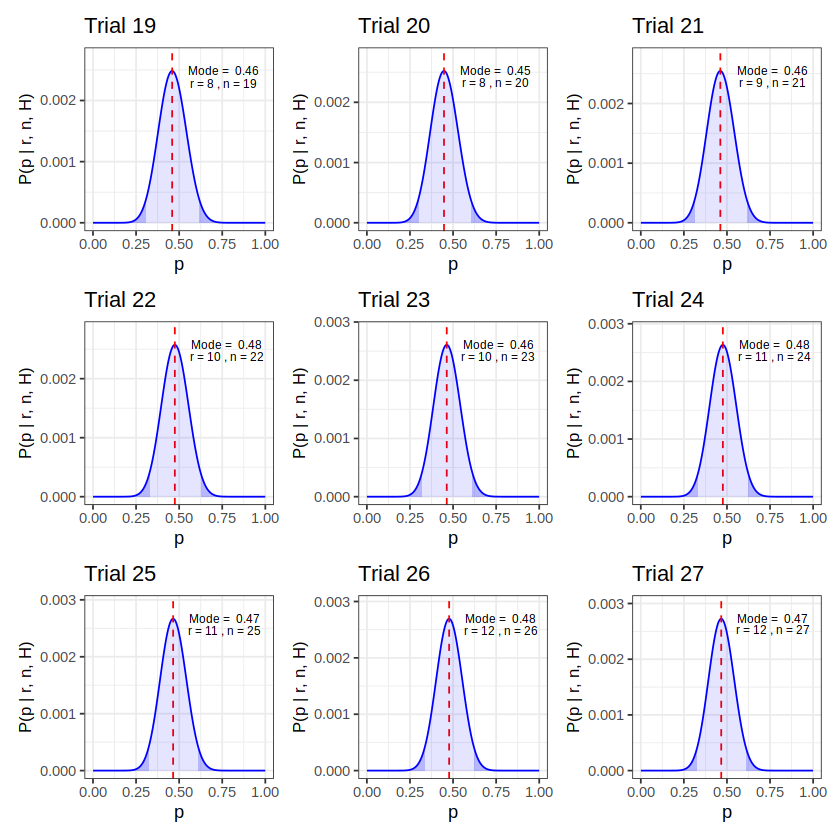

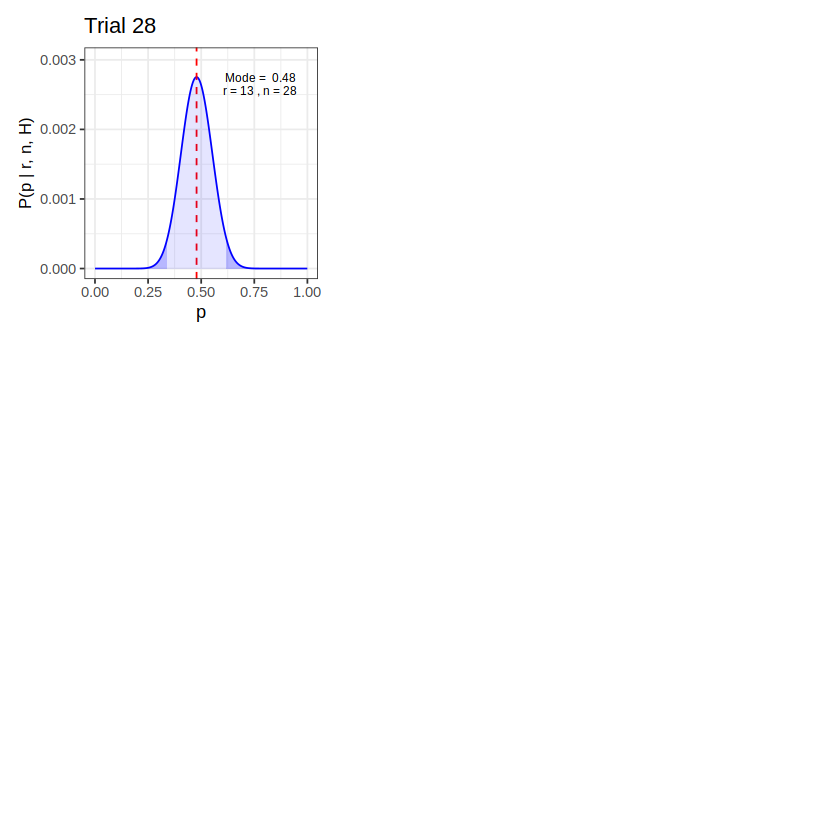

In [25]:
# create the combined plot using plots in the list
library(patchwork)
combined_plots1 <- (plots[[1]] +plots[[2]]+  plots[[3]]) / (plots[[4]] +plots[[5]]+  plots[[6]]) / (plots[[7]] +plots[[8]] + plots[[9]])  
combined_plots2 <-  (plots[[10]] +plots[[11]] + plots[[12]])  / (plots[[13]] +plots[[14]] + plots[[15]])  / (plots[[16]] +plots[[17]] + plots[[18]]) 
combined_plots3 <-  (plots[[19]] +plots[[20]] +plots[[21]]) /(plots[[22]] +plots[[23]] +plots[[24]])  /(plots[[25]] +plots[[26]] +plots[[27]]) 
combined_plots4 <- (plots[[28]]+plot_spacer()+plot_spacer()) /(plot_spacer()+plot_spacer()+plot_spacer())  /(plot_spacer()+plot_spacer()+plot_spacer())

combined_plots1
combined_plots2
combined_plots3
combined_plots4

d) By analyzing the data sequentially instead of all at once, I obtained different results.<br>
Specifically, for the sequence of outcomes in this exercise, we observe a significant imbalance between the number of T and H outcomes in the first eight trials. As a result, performing a sequential analysis on these initial coin flips leads to the conclusion that the coin is not fair, resulting in a highly asymmetric likelihood and posterior distribution with the mode shifted to the left. <br>
As we proceed with the sequential analysis and the value of n increases, the initial imbalance between the number of T and H outcomes becomes less pronounced. Consequently, the posterior distribution (with either beta or uniform prior) becomes more centered around zero and tends to converge towards the posterior resulting from the analysis of all the data at once.<br>

## Exercise 4 - Six Boxes Toy Model : inference
• write a program in R that performs a simulation of the process
1) after selecting a random box
2) make random sampling from the box
3) prints on the standard output the probability of selecting each box
4) plot the probability for each box as a function of the number of trial

Notice that after each extraction, we update the probabilities of each hypothesis, using Bayes’
theorem: $P(H_j | I_n) = \frac{P(E^n|H_j I_{n-1}) P(H_j|I_{n-1})}{\Sigma P(E^n|H_j I_{n-1}) P(H_j|I_{n-1}) }$


In [76]:
set.seed(42)

In [144]:
# Create a vector of box labels
boxes <- c("H0", "H1", "H2", "H3", "H4", "H5")
n_boxes<- 0:5

# Set the number of trials and count variables
ntrials <- 500
count_black <- 0 
count_white <- 0

#select a random box
j <- sample(n_boxes, size = 1)
n_black <- 5-j
n_white <- j
cat("Box ", j, " choosen: ", n_black, " black and ", n_white, "white \n")

#sample from the chosen box with replacement
x  <- sample(c(0, 1), size = ntrials, replace = TRUE, prob =c(n_black/5,n_white/5))  #0=black, 1=white

#count numbers of black and white stones
counts <- table(x)
count_black <- ifelse(is.na(counts[1]), 0, counts[1])
count_white <- ifelse(is.na(counts[2]), 0, counts[2])
cat('Sampling outcome:  black-->', count_black*100/ntrials,' white -->', count_white*100/ntrials)

Box  4  choosen:  1  black and  4 white 
Sampling outcome:  black--> 19.4  white --> 80.6

Trial,E,H0,H1,H2,H3,H4,H5
0,0,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667
8,1,0.0000000,0.0020000,0.0760000,0.3830000,0.5390000,0.0000000
16,1,0.0000000,0.0000000,0.0010000,0.0660000,0.9330000,0.0000000
24,1,0.0000000,0.0000000,0.0000000,0.0190000,0.9810000,0.0000000
32,1,0.0000000,0.0000000,0.0000000,0.0020000,0.9980000,0.0000000
40,0,0.0000000,0.0000000,0.0000000,0.0010000,0.9990000,0.0000000
48,0,0.0000000,0.0000000,0.0000000,0.0010000,0.9990000,0.0000000
56,1,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
64,1,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
72,1,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000


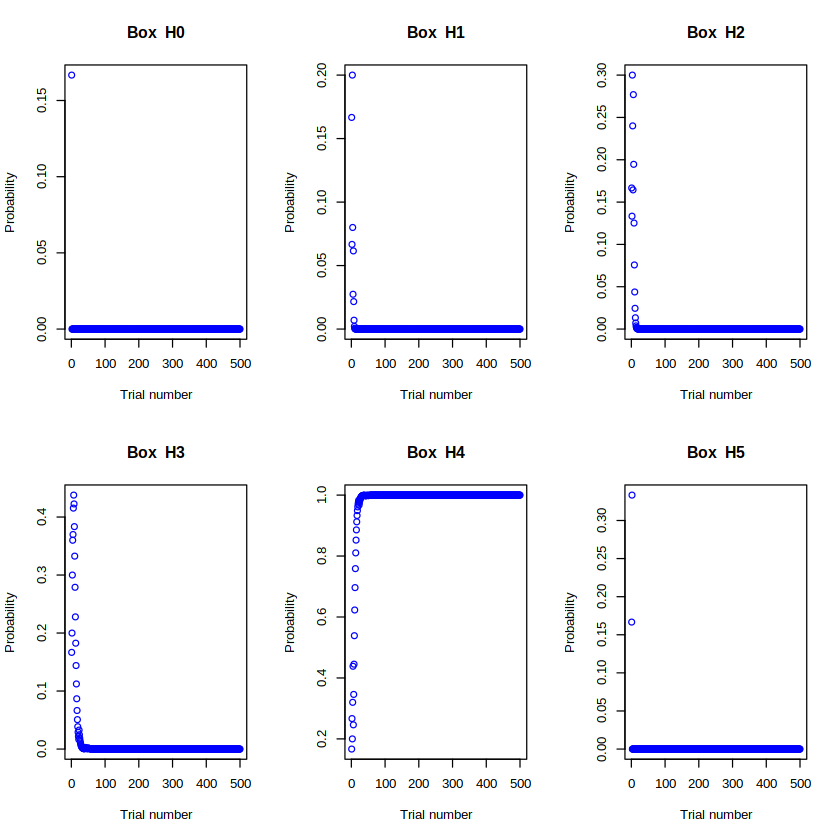

In [145]:
P <- matrix(0, nrow=ntrials, ncol=length(boxes))
P[1,] <- rep(1/6, length(boxes))  # Initialize P with uniform pdf in the first row

# Prints on the standard output the probability of selecting each box
P_final <- matrix(0, nrow=ntrials+1, ncol=length(boxes)+2)
P_final[1,3:8] <- rep(1/6, length(boxes))  # Initialize P with uniform pdf in the first row
colnames(P_final) <- c("Trial", "E", boxes)

#compute the probability of each hypotesis P(Hj|In)
for (i in 2:ntrials) {  #i=index of trials        
    E  <- x[i]  #select the sampled E for a specific trial number i (W<-1; B<-0)
    for (j in 1:length(boxes)) {  #j=index of box
        if (E==0) { P[i,j] <- ((5-j+1)/5) * P[i-1,j] }
        if (E==1) { P[i,j] <- ((j-1)/5) * P[i-1,j]}
    }
    P[i,] <- P[i,] / sum(P[i,])  # Normalize the row
    
    # Update the corresponding row in P_final
    P_final[i,1] <- i-1  # Trial number
    P_final[i,2] <- E  # Observed E value
    P_final[i,3:(length(boxes)+2)] <- round(P[i,], 3)  # Probability of each box
}

P_final_sub <- P_final[seq(1, 100, by = 8), ]
P_final_sub

# Plotting each column of the P matrix separately in function of the number of trials
par(mfrow=c(2,3))  # set the layout of the plots to 2 rows and 3 columns
for (j in 1:length(boxes)) {
  plot(1:ntrials, P[,j], type='p', col = 'blue', cex = 1, pch=1, xlab='Trial number', ylab='Probability', main=paste("Box ", boxes[j]))
}